# **PART 3**

**Fitting random labels**

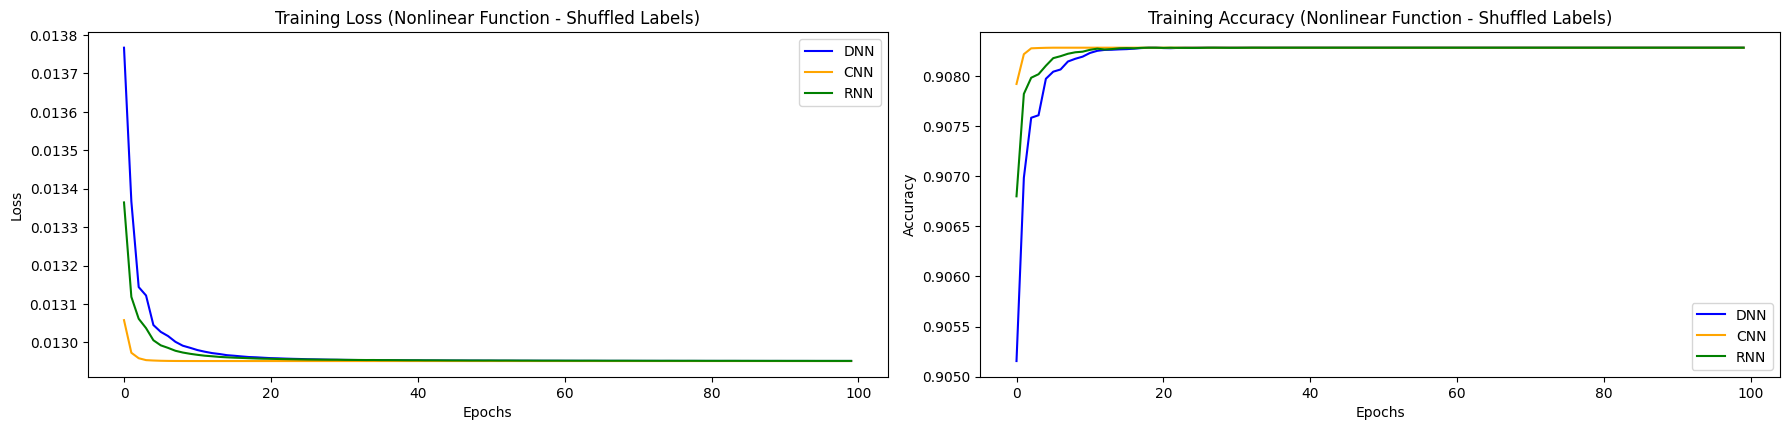

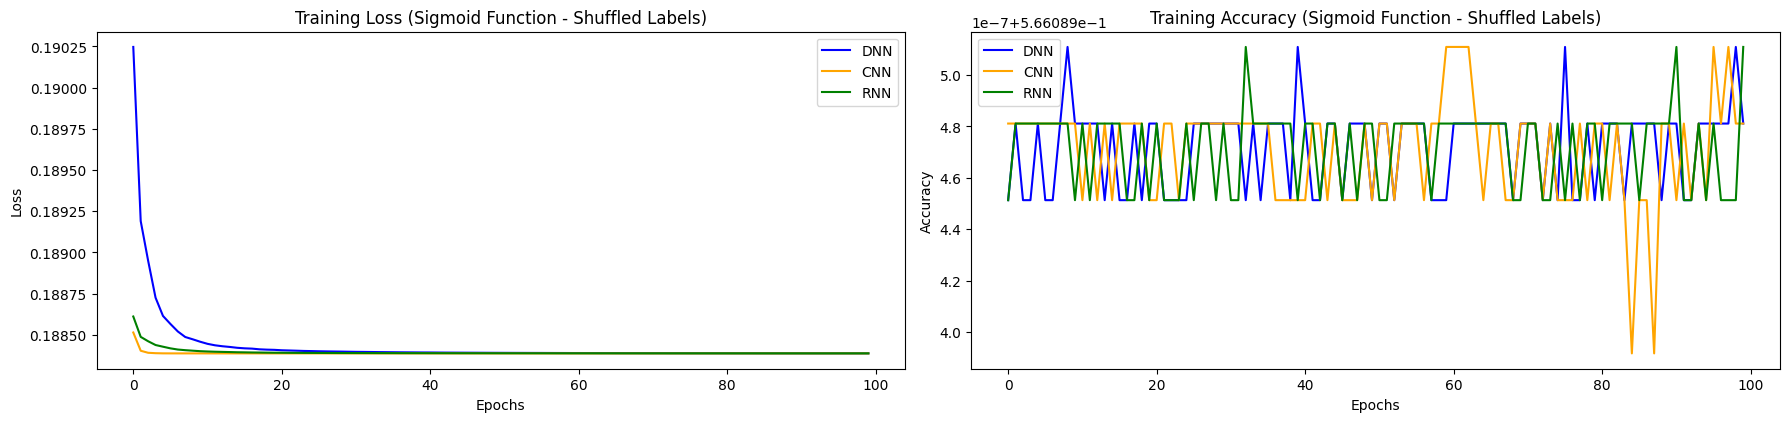

In [ ]:
# Randomly shuffle the labels for both nonlinear and sigmoid functions
np.random.shuffle(y_train_nonlinear)
np.random.shuffle(y_train_sigmoid)

dnn_model_nonlinear_shuffled = create_dnn_model()
cnn_model_nonlinear_shuffled = create_cnn_model()
rnn_model_nonlinear_shuffled = create_rnn_model()

dnn_model_nonlinear_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_model_nonlinear_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn_model_nonlinear_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])

dnn_history_nonlinear_shuffled = dnn_model_nonlinear_shuffled.fit(x_train_nonlinear, y_train_nonlinear, epochs=100, verbose=0)
cnn_history_nonlinear_shuffled = cnn_model_nonlinear_shuffled.fit(x_train_nonlinear.reshape(-1, 28, 28, 1), y_train_nonlinear, epochs=100, verbose=0)
rnn_history_nonlinear_shuffled = rnn_model_nonlinear_shuffled.fit(x_train_nonlinear, y_train_nonlinear, epochs=100, verbose=0)

dnn_model_sigmoid_shuffled = create_dnn_model()
cnn_model_sigmoid_shuffled = create_cnn_model()
rnn_model_sigmoid_shuffled = create_rnn_model()

dnn_model_sigmoid_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_model_sigmoid_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn_model_sigmoid_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])

dnn_history_sigmoid_shuffled = dnn_model_sigmoid_shuffled.fit(x_train_sigmoid, y_train_sigmoid, epochs=100, verbose=0)
cnn_history_sigmoid_shuffled = cnn_model_sigmoid_shuffled.fit(x_train_sigmoid.reshape(-1, 28, 28, 1), y_train_sigmoid, epochs=100, verbose=0)
rnn_history_sigmoid_shuffled = rnn_model_sigmoid_shuffled.fit(x_train_sigmoid, y_train_sigmoid, epochs=100, verbose=0)



plt.figure(figsize=(18, 8))


plt.subplot(2, 2, 1)
plt.plot(dnn_history_nonlinear_shuffled.history['loss'], label='DNN', color='blue')
plt.plot(cnn_history_nonlinear_shuffled.history['loss'], label='CNN', color='orange')
plt.plot(rnn_history_nonlinear_shuffled.history['loss'], label='RNN', color='green')
plt.title('Training Loss (Nonlinear Function - Shuffled Labels)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


dnn_acc_nonlinear_shuffled = 1 - np.array(dnn_history_nonlinear_shuffled.history['mae'])  
cnn_acc_nonlinear_shuffled = 1 - np.array(cnn_history_nonlinear_shuffled.history['mae'])
rnn_acc_nonlinear_shuffled = 1 - np.array(rnn_history_nonlinear_shuffled.history['mae'])
plt.subplot(2, 2, 2)
plt.plot(dnn_acc_nonlinear_shuffled, label='DNN', color='blue')
plt.plot(cnn_acc_nonlinear_shuffled, label='CNN', color='orange')
plt.plot(rnn_acc_nonlinear_shuffled, label='RNN', color='green')
plt.title('Training Accuracy (Nonlinear Function - Shuffled Labels)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 8))


plt.subplot(2, 2, 1)
plt.plot(dnn_history_sigmoid_shuffled.history['loss'], label='DNN', color='blue')
plt.plot(cnn_history_sigmoid_shuffled.history['loss'], label='CNN', color='orange')
plt.plot(rnn_history_sigmoid_shuffled.history['loss'], label='RNN', color='green')
plt.title('Training Loss (Sigmoid Function - Shuffled Labels)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


dnn_acc_sigmoid_shuffled = 1 - np.array(dnn_history_sigmoid_shuffled.history['mae'])  # Convert mean absolute error to accuracy
cnn_acc_sigmoid_shuffled = 1 - np.array(cnn_history_sigmoid_shuffled.history['mae'])
rnn_acc_sigmoid_shuffled = 1 - np.array(rnn_history_sigmoid_shuffled.history['mae'])
plt.subplot(2, 2, 2)
plt.plot(dnn_acc_sigmoid_shuffled, label='DNN', color='blue')
plt.plot(cnn_acc_sigmoid_shuffled, label='CNN', color='orange')
plt.plot(rnn_acc_sigmoid_shuffled, label='RNN', color='green')
plt.title('Training Accuracy (Sigmoid Function - Shuffled Labels)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Number of parameters v.s. Generalization**

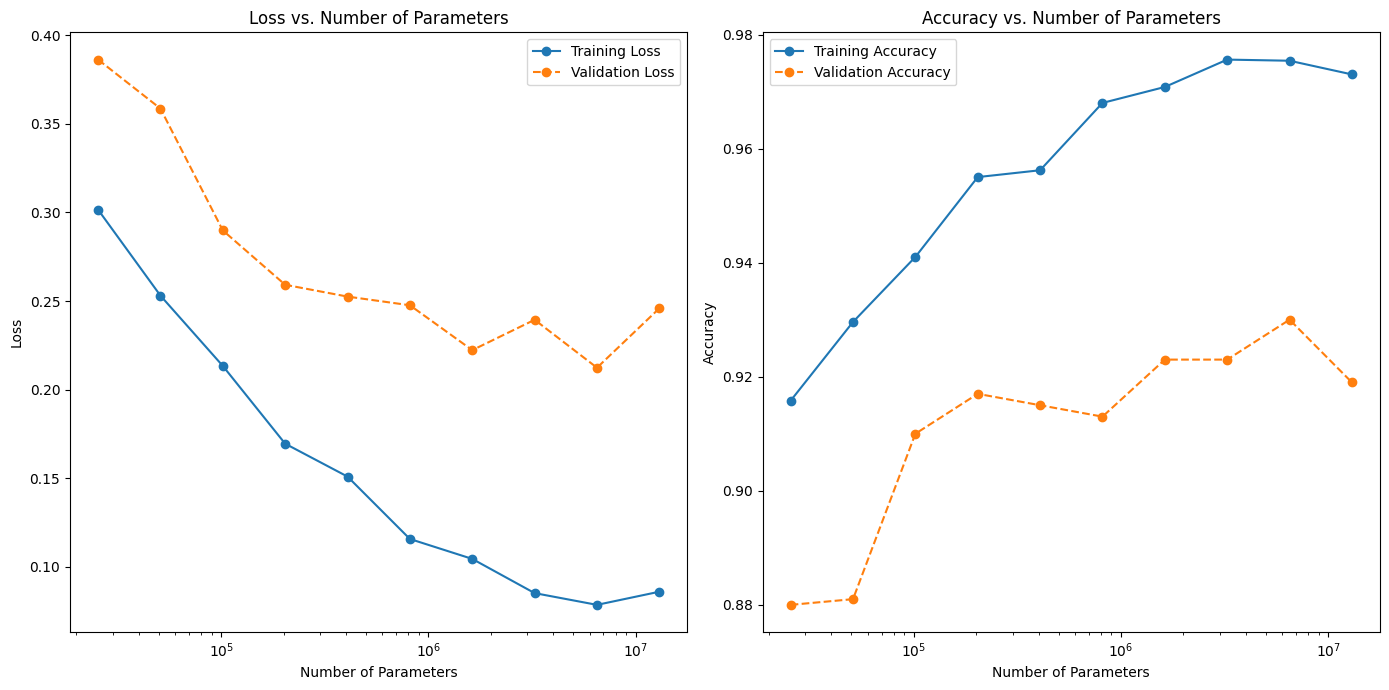

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[:5000] / 255.0, x_test[:1000] / 255.0
y_train, y_test = y_train[:5000], y_test[:1000]

y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

def create_model(num_neurons):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(num_neurons, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

neurons_list = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

results = []

for neurons in neurons_list:
    model = create_model(neurons)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)
    final_train_loss, final_train_accuracy = history.history['loss'][-1], history.history['accuracy'][-1]
    final_val_loss, final_val_accuracy = history.history['val_loss'][-1], history.history['val_accuracy'][-1]
    results.append({'neurons': neurons, 'train_loss': final_train_loss, 'train_accuracy': final_train_accuracy, 'test_loss': final_val_loss, 'test_accuracy': final_val_accuracy})

num_parameters = [create_model(neurons).count_params() for neurons in neurons_list]
train_losses = [result['train_loss'] for result in results]
train_accuracies = [result['train_accuracy'] for result in results]
test_losses = [result['test_loss'] for result in results]
test_accuracies = [result['test_accuracy'] for result in results]

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(num_parameters, train_losses, label='Training Loss', marker='o')
plt.plot(num_parameters, test_losses, label='Validation Loss', marker='o', linestyle='--')
plt.xlabel('Number of Parameters')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Parameters')
plt.legend()
plt.xscale('log')  #

plt.subplot(1, 2, 2)
plt.plot(num_parameters, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(num_parameters, test_accuracies, label='Validation Accuracy', marker='o', linestyle='--')
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Parameters')
plt.legend()
plt.xscale('log')  

plt.tight_layout()
plt.show()
